In [51]:
!pip install scikit-learn


from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [52]:
#Additional data cleaning was done on the csv file, where 0 represents non-ACP and 1 represents ACP
df = pd.read_csv("New_anticancer.csv")
df.head(3000)


,peptide_sequence,ACP
0,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,0
1,AAEFPDFYDSEEQMGPHQEAEDEKDRADQRVLTEEEKKELENLAAM...,0
2,AAGMGFFGAR,0
3,AAKPMGITCDLLSLWKVGHAACAAHCLVLGDVGGYCTKEGLCVCKE,0
4,AALKGCWTKSIPPKPCFGKR,0
...,...,...
2995,YLRAGSGRYRYQKVGYWAEGLTLDTSFIPWASPSAGPLPA,1
2996,HDIGGF,1
2997,SGTEACMAVLRLMRAFTGR,1
2998,IDVSPKQIVSV,1


In [53]:
import requests
import zipfile
import os

# Step 1: Download the Pfeature zip file
#url = "https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip"
#response = requests.get(url)

# Save the zip file
#with open("Pfeature.zip", "wb") as f:
    #f.write(response.content)

# Step 2: Unzip the downloaded file
#with zipfile.ZipFile("Pfeature.zip", 'r') as zip_ref:
    #zip_ref.extractall("Pfeature")


In [54]:
!pwd

/Users/percy/ML projects/Github


In [55]:
%cd /Users/percy/ML projects/Github/Pfeature/Pfeature

/Users/percy/ML projects/Github/Pfeature/Pfeature


In [56]:
!pwd

/Users/percy/ML projects/Github/Pfeature/Pfeature


In [57]:
!python setup.py install

/Users/percy/miniconda3/envs/OLCC2019/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
running install_lib
copying build/lib/Pfeature/bonds.csv -> /Users/percy/miniconda3/envs/OLCC2019/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/pfeature.py -> /Users/percy/miniconda3/envs/OLCC2019/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/AAIndexNames.csv -> /Users/percy/miniconda3/envs/OLCC2019/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/aaindices.csv -> /Users/percy/miniconda3/envs/OLCC2019/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/atom.csv -> /Users/percy/miniconda3/envs/OLCC2019/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/PhysicoChemical.csv -> /Users/percy/miniconda3/envs/OLCC2019/lib/python3.7/site-packages/Pfeature
copying build/lib/Pfeature/__init__.py -> /Users/percy/miniconda3/envs/O

In [58]:
! conda install -c bioconda cd-hit -y

Channels:
 - bioconda
 - conda-forge
 - defaults
 - pytorch
Platform: osx-64
Solving environment: done

# All requested packages already installed.



# Convert CSV to FASTA format

In [59]:
import pandas as pd

def csv_to_fasta(csv_file, sequence_column, output_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Open the output file in write mode
    with open(output_file, 'w') as fasta_file:
        # Iterate over each row in the DataFrame
        for index, row in df.iterrows():
            # Extract the sequence from the specified column
            sequence = row[sequence_column]
            # Write the FASTA header and sequence to the output file
            fasta_file.write(f'>{index}\n{sequence}\n')

In [60]:
%cd /Users/percy/ML projects/Github

/Users/percy/ML projects/Github


In [61]:
!ls -l

total 3400
-rw-r--r--  1 percy  staff  161296 May 20 12:07 Alternate Training Dataset.txt
-rw-r--r--  1 percy  staff  184368 May 20 13:00 Anticancer-peptides-ClassificationDNN.ipynb
-rw-r--r--  1 percy  staff   73884 May 20 12:07 Neg_New_anticancer.csv
-rw-r--r--  1 percy  staff  150083 May 20 12:11 New_anticancer.csv
drwxr-xr-x  4 percy  staff     128 May 20 12:47 Pfeature
-rw-r--r--  1 percy  staff  519486 May 20 13:00 Pfeature.zip
-rw-r--r--  1 percy  staff   76219 May 20 12:07 Pos_New_anticancer.csv
-rw-r--r--  1 percy  staff   79426 May 20 13:00 neg_sequences.fasta
-rw-r--r--  1 percy  staff   70626 May 20 12:30 neg_sequences_cdhit.txt
-rw-r--r--  1 percy  staff   68458 May 20 12:30 neg_sequences_cdhit.txt.clstr
-rw-r--r--  1 percy  staff   81842 May 20 13:00 pos_sequences.fasta
-rw-r--r--  1 percy  staff   78072 May 20 12:30 pos_sequences_cdhit.txt
-rw-r--r--  1 percy  staff   63314 May 20 12:30 pos_sequences_cdhit.txt.clstr


Positive class

In [62]:
csv_file = "Pos_New_anticancer.csv"  # Replace with your CSV file
sequence_column = 'peptide_sequence'  # Replace with the name of the column containing the sequences
output_file = 'pos_sequences.fasta'  # Output FASTA file
csv_to_fasta(csv_file, sequence_column, output_file)

Negative class

In [63]:
# Fasta file created
csv_file = "Neg_New_anticancer.csv"  # Replace with your CSV file
sequence_column = 'peptide_sequence'  # Replace with the name of the column containing the sequences
output_file = 'neg_sequences.fasta'  # Output FASTA file
csv_to_fasta(csv_file, sequence_column, output_file)

In [64]:
! cat neg_sequences.fasta

>0
AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC
>1
AAEFPDFYDSEEQMGPHQEAEDEKDRADQRVLTEEEKKELENLAAMDLELQKIAEKFSQR
>2
AAGMGFFGAR
>3
AAKPMGITCDLLSLWKVGHAACAAHCLVLGDVGGYCTKEGLCVCKE
>4
AALKGCWTKSIPPKPCFGKR
>5
AANFGPSVFTPEVHETWQKFLNVVVAALGKQYH
>6
ACDTATCVTHRLAGLLSRSGGVVKNNFVPTNVGSKAF
>7
ACIKNGGRCVASGGPPYCCSNYCLQIAGQSYGVCKKH
>8
ACNFQSCWATCQAQHSIYFRRAFCDRSQCKCVFVRG
>9
ACYCRIGACVSGERLTGACGLNGRIYRLCCR
>10
ACYCRIPACFAGERRYGTCFYLGRVWAFCC
>11
ACYCRIPACLAGERRYGTCFYLGRVWAFCC
>12
ACYCRIPACLAGERRYGTCFYMGRVWAFCC
>13
ACYCRIPACLAGERRYGTCFYRRRVWAFCC
>14
ADRGWIKTLTKDCPNVISSICAGTIITACKNCA
>15
ADTLACRQSHQSCSFVACRAPSVDIGTCRGGKLKCCKWAPSS
>16
AELRCMCIKTTSGIHPKNIQSLEVIGKGTHCNQVEVIATLKDGRKICLDPDAPRIKKIVQKKLAGDES
>17
AERVGAGAPVYL
>18
AEVAPAPAAAAPAKAPKKKAAAKPKKAGPS
>19
AFKLLGRIIHHVGNFVYGFSHVF
>20
AFPPPNVPGPRFPPPNFPGPRFPPPNFPGPRFPPPNFPGPRFPPPNFPGPPFPPPIFPGPWFPPPPPFRPPPFGPPRFP
>21
AFPPPNVPGPRFPPPNVPGPRFPPPNFPGPRFPPPNFPGPRFPPPNFPGPPFPPPIFPGPWFPPPPPFRPPPFGPPRFP
>22
AFTCHCRRSCYSTEYSYGTCTVMGINHRFCCL
>23
AGANDLCQECEDIVHLLTKMTKE

#Remove redundant sequences

In [65]:
! cd-hit -i neg_sequences.fasta -o neg_sequences_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Apr 11 2024, 12:09:18
Command: cd-hit -i neg_sequences.fasta -o
         neg_sequences_cdhit.txt -c 0.99

Started: Mon May 20 13:01:25 2024
                            Output                              
----------------------------------------------------------------
total seq: 2175
longest and shortest : 113 and 11
Total letters: 64579
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89777054

comparing sequences from          0  to       2175
..
     2175  finished       1951  clusters

Approximated maximum memory consumption: 82M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [66]:
! cd-hit -i pos_sequences.fasta -o pos_sequences_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Apr 11 2024, 12:09:18
Command: cd-hit -i pos_sequences.fasta -o
         pos_sequences_cdhit.txt -c 0.99

Started: Mon May 20 13:01:25 2024
                            Output                              
----------------------------------------------------------------
total seq: 1982
longest and shortest : 54 and 11
Total letters: 65180
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 16M = 16M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 81M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 89782179

comparing sequences from          0  to       1982
.
     1982  finished       1982  clusters

Approximated maximum memory consumption: 82M
writing new database
writing clustering information
program completed !

Total CPU time 0.08


In [67]:
!ls -l

total 3728
-rw-r--r--  1 percy  staff  161296 May 20 12:07 Alternate Training Dataset.txt
-rw-r--r--  1 percy  staff  184368 May 20 13:00 Anticancer-peptides-ClassificationDNN.ipynb
-rw-r--r--  1 percy  staff   73884 May 20 12:07 Neg_New_anticancer.csv
-rw-r--r--  1 percy  staff  150083 May 20 12:11 New_anticancer.csv
drwxr-xr-x  4 percy  staff     128 May 20 12:47 Pfeature
-rw-r--r--  1 percy  staff  519486 May 20 13:00 Pfeature.zip
-rw-r--r--  1 percy  staff   76219 May 20 12:07 Pos_New_anticancer.csv
-rw-r--r--  1 percy  staff   79426 May 20 13:01 neg_sequences.fasta
-rw-r--r--  1 percy  staff   70626 May 20 13:01 neg_sequences_cdhit.txt
-rw-r--r--  1 percy  staff   68458 May 20 13:01 neg_sequences_cdhit.txt.clstr
-rw-r--r--  1 percy  staff   81842 May 20 13:01 pos_sequences.fasta
-rw-r--r--  1 percy  staff   78072 May 20 13:01 pos_sequences_cdhit.txt
-rw-r--r--  1 percy  staff   63314 May 20 13:01 pos_sequences_cdhit.txt.clstr


# Define functions for calculating the different features

In [68]:
import pandas as pd

# Amino acid composition (AAC)

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('pos_sequences_cdhit.txt')


,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.00,14.29,4.76,2.38,4.76,11.90,4.76,2.38,21.43,2.38,2.38,0.00,7.14,2.38,4.76,7.14,0.00,0.00,4.76,2.38
1,20.51,0.00,2.56,12.82,2.56,7.69,5.13,0.00,5.13,2.56,7.69,5.13,0.00,0.00,2.56,5.13,5.13,7.69,0.00,7.69
2,2.63,0.00,5.26,2.63,5.26,0.00,5.26,5.26,10.53,7.89,0.00,7.89,5.26,5.26,5.26,13.16,5.26,2.63,0.00,10.53
3,11.11,0.00,11.11,11.11,0.00,3.70,0.00,3.70,3.70,18.52,0.00,3.70,7.41,0.00,11.11,3.70,3.70,3.70,0.00,3.70
4,6.52,0.00,8.70,6.52,2.17,10.87,0.00,6.52,4.35,6.52,4.35,0.00,2.17,8.70,6.52,2.17,2.17,10.87,6.52,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,13.33,0.00,0.00,0.00,6.67,0.00,0.00,0.00,13.33,6.67,0.00,0.00,0.00,0.00,33.33,13.33,13.33,0.00,0.00,0.00
1978,7.69,1.92,5.77,11.54,0.00,7.69,1.92,15.38,11.54,5.77,1.92,0.00,3.85,1.92,5.77,3.85,5.77,5.77,0.00,1.92
1979,19.05,0.00,11.90,9.52,0.00,7.14,2.38,7.14,2.38,7.14,0.00,0.00,2.38,0.00,9.52,4.76,9.52,4.76,2.38,0.00
1980,15.79,5.26,5.26,5.26,0.00,5.26,0.00,0.00,10.53,15.79,0.00,0.00,5.26,0.00,10.53,5.26,0.00,10.53,5.26,0.00


In [69]:
# Dipeptide composition (DPC)

#from Pfeature.pfeature import dpc_wp

#def dpc(input):
  #a = input.rstrip('txt')
  #output = a + 'dpc.csv'
  #df_out = dpc_wp(input, output, 1)
  #df_in = pd.read_csv(output)
  #return df_in

#feature = dpc('pos_sequences_cdhit.txt')
#feature

# Calculate features for both classes and merge

In [81]:
pos = 'pos_sequences_cdhit.txt'
neg = 'neg_sequences_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df

feature = feature_calc(pos, neg, aac) # AAC
#feature = feature_calc(pos, neg, dpc) # DPC
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,0.00,14.29,4.76,2.38,4.76,11.90,4.76,2.38,21.43,2.38,...,0.00,7.14,2.38,4.76,7.14,0.00,0.00,4.76,2.38,positive
1,20.51,0.00,2.56,12.82,2.56,7.69,5.13,0.00,5.13,2.56,...,5.13,0.00,0.00,2.56,5.13,5.13,7.69,0.00,7.69,positive
2,2.63,0.00,5.26,2.63,5.26,0.00,5.26,5.26,10.53,7.89,...,7.89,5.26,5.26,5.26,13.16,5.26,2.63,0.00,10.53,positive
3,11.11,0.00,11.11,11.11,0.00,3.70,0.00,3.70,3.70,18.52,...,3.70,7.41,0.00,11.11,3.70,3.70,3.70,0.00,3.70,positive
4,6.52,0.00,8.70,6.52,2.17,10.87,0.00,6.52,4.35,6.52,...,0.00,2.17,8.70,6.52,2.17,2.17,10.87,6.52,4.35,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,6.67,0.00,0.00,0.00,0.00,6.67,0.00,13.33,33.33,6.67,...,6.67,0.00,0.00,0.00,0.00,0.00,20.00,6.67,0.00,negative
1947,10.00,10.00,0.00,5.00,0.00,5.00,0.00,5.00,5.00,5.00,...,5.00,10.00,0.00,0.00,0.00,10.00,10.00,0.00,15.00,negative
1948,20.00,0.00,6.67,6.67,0.00,0.00,0.00,26.67,6.67,6.67,...,13.33,0.00,0.00,0.00,0.00,6.67,0.00,0.00,6.67,negative
1949,12.50,0.00,12.50,6.25,0.00,0.00,0.00,25.00,6.25,12.50,...,12.50,0.00,0.00,0.00,0.00,6.25,0.00,0.00,6.25,negative


# Covert from txt to csv

In [86]:
type(feature)

pandas.core.frame.DataFrame

In [114]:
# Assigns the features to X and class label to Y
X = feature.drop('class', axis=1)
y = feature['class'].copy()
     

In [115]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [116]:
X.shape

(3933, 20)

In [118]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.00,14.29,4.76,2.38,4.76,11.90,4.76,2.38,21.43,2.38,2.38,0.00,7.14,2.38,4.76,7.14,0.00,0.00,4.76,2.38
1,20.51,0.00,2.56,12.82,2.56,7.69,5.13,0.00,5.13,2.56,7.69,5.13,0.00,0.00,2.56,5.13,5.13,7.69,0.00,7.69
2,2.63,0.00,5.26,2.63,5.26,0.00,5.26,5.26,10.53,7.89,0.00,7.89,5.26,5.26,5.26,13.16,5.26,2.63,0.00,10.53
3,11.11,0.00,11.11,11.11,0.00,3.70,0.00,3.70,3.70,18.52,0.00,3.70,7.41,0.00,11.11,3.70,3.70,3.70,0.00,3.70
4,6.52,0.00,8.70,6.52,2.17,10.87,0.00,6.52,4.35,6.52,4.35,0.00,2.17,8.70,6.52,2.17,2.17,10.87,6.52,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,6.67,0.00,0.00,0.00,0.00,6.67,0.00,13.33,33.33,6.67,0.00,6.67,0.00,0.00,0.00,0.00,0.00,20.00,6.67,0.00
1947,10.00,10.00,0.00,5.00,0.00,5.00,0.00,5.00,5.00,5.00,5.00,5.00,10.00,0.00,0.00,0.00,10.00,10.00,0.00,15.00
1948,20.00,0.00,6.67,6.67,0.00,0.00,0.00,26.67,6.67,6.67,0.00,13.33,0.00,0.00,0.00,0.00,6.67,0.00,0.00,6.67
1949,12.50,0.00,12.50,6.25,0.00,0.00,0.00,25.00,6.25,12.50,0.00,12.50,0.00,0.00,0.00,0.00,6.25,0.00,0.00,6.25


In [119]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)
     

In [120]:
! pip install lazypredict

In [124]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature.drop('class', axis=1)
y = feature['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [00:05<00:00,  5.19it/s]


In [125]:
# Prints the model performance (Training set)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
RandomForestClassifier,1.00,1.00,None,1.00,1.00,0.63
DecisionTreeClassifier,1.00,1.00,None,1.00,1.00,0.09
ExtraTreeClassifier,1.00,1.00,None,1.00,1.00,0.05
ExtraTreesClassifier,1.00,1.00,None,1.00,1.00,0.41
LabelPropagation,1.00,1.00,None,1.00,1.00,0.53
LabelSpreading,1.00,1.00,None,1.00,1.00,0.65
BaggingClassifier,0.99,0.99,None,0.99,0.99,0.27
LGBMClassifier,0.99,0.99,None,0.99,0.98,0.17
SVC,0.89,0.88,None,0.88,0.78,0.95


In [126]:
# Prints the model performance (Test set)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
ExtraTreesClassifier,0.83,0.83,None,0.83,0.67,0.34
SVC,0.83,0.83,None,0.82,0.66,0.51
LGBMClassifier,0.82,0.82,None,0.82,0.65,0.12
NuSVC,0.82,0.82,None,0.82,0.64,0.61
KNeighborsClassifier,0.82,0.82,None,0.81,0.64,0.09
RandomForestClassifier,0.81,0.81,None,0.81,0.63,0.58
QuadraticDiscriminantAnalysis,0.81,0.81,None,0.81,0.63,0.02
LinearDiscriminantAnalysis,0.80,0.80,None,0.80,0.61,0.05
AdaBoostClassifier,0.80,0.80,None,0.80,0.60,0.38


[(0.0, 1.0)]

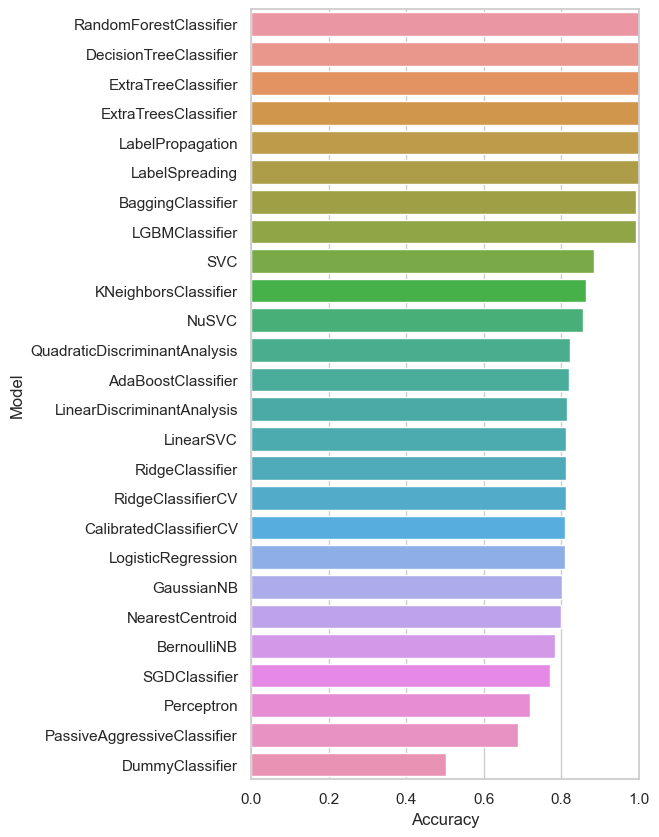

In [127]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

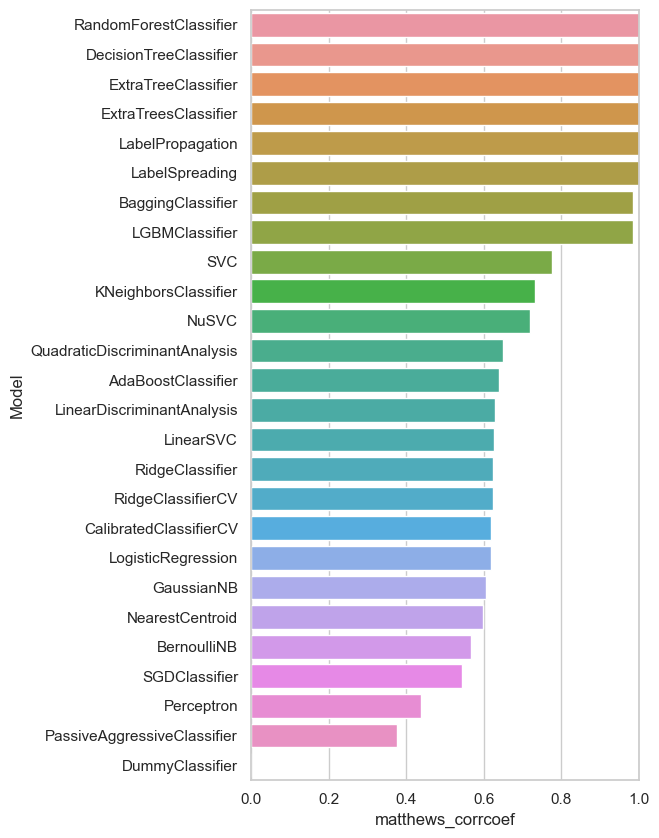

In [128]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

# Random Forest Model

In [129]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [130]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [131]:
# Simplest and quickest way to obtain the model performance (Accuracy)
rf.score(X_test,y_test)

0.820838627700127

In [132]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.820838627700127

In [133]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.645902193761035

In [134]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[296,  94],
       [ 47, 350]])

In [136]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

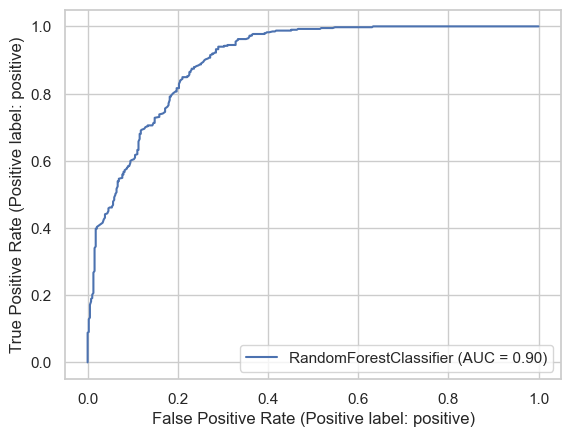

In [137]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf, X_test, y_test)  
plt.show()

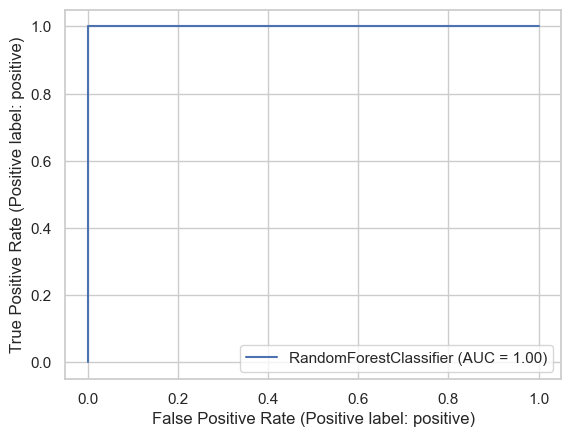

In [138]:
plot_roc_curve(rf, X_train, y_train)  
plt.show()

# Feature importance

In [139]:
# Display Dataframe of the dataset after feature selection (variance threshold)
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,0.00,14.29,4.76,2.38,4.76,11.90,4.76,2.38,21.43,2.38,2.38,0.00,7.14,2.38,4.76,7.14,0.00,0.00,4.76,2.38
1,20.51,0.00,2.56,12.82,2.56,7.69,5.13,0.00,5.13,2.56,7.69,5.13,0.00,0.00,2.56,5.13,5.13,7.69,0.00,7.69
2,2.63,0.00,5.26,2.63,5.26,0.00,5.26,5.26,10.53,7.89,0.00,7.89,5.26,5.26,5.26,13.16,5.26,2.63,0.00,10.53
3,11.11,0.00,11.11,11.11,0.00,3.70,0.00,3.70,3.70,18.52,0.00,3.70,7.41,0.00,11.11,3.70,3.70,3.70,0.00,3.70
4,6.52,0.00,8.70,6.52,2.17,10.87,0.00,6.52,4.35,6.52,4.35,0.00,2.17,8.70,6.52,2.17,2.17,10.87,6.52,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,6.67,0.00,0.00,0.00,0.00,6.67,0.00,13.33,33.33,6.67,0.00,6.67,0.00,0.00,0.00,0.00,0.00,20.00,6.67,0.00
1947,10.00,10.00,0.00,5.00,0.00,5.00,0.00,5.00,5.00,5.00,5.00,5.00,10.00,0.00,0.00,0.00,10.00,10.00,0.00,15.00
1948,20.00,0.00,6.67,6.67,0.00,0.00,0.00,26.67,6.67,6.67,0.00,13.33,0.00,0.00,0.00,0.00,6.67,0.00,0.00,6.67
1949,12.50,0.00,12.50,6.25,0.00,0.00,0.00,25.00,6.25,12.50,0.00,12.50,0.00,0.00,0.00,0.00,6.25,0.00,0.00,6.25


In [140]:
# Retrieve feature importance from the RF model
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Retrieve feature names
feature_names = pd.Series(X2.columns, name = 'Feature')

In [141]:
# Combine feature names and Gini values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df
    

,Feature,Gini
0,AAC_A,0.04
1,AAC_C,0.12
2,AAC_D,0.08
3,AAC_E,0.13
4,AAC_F,0.03
5,AAC_G,0.05
6,AAC_H,0.02
7,AAC_I,0.03
8,AAC_K,0.07
9,AAC_L,0.05


Text(0.5, 0, 'Feature Importance')

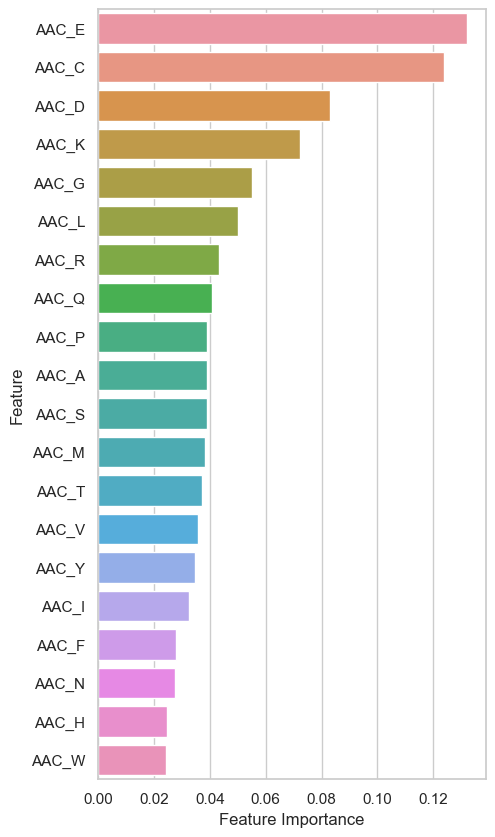

In [142]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:20] # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")